# Importing the libraries

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [358]:
salary = pd.read_csv('salary.csv', low_memory=False)

In [359]:
#first 5 rows of the dataset
salary.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [360]:
#to get rows and columns of the dataset
salary.shape

(149481, 21)

In [361]:
#to find missing values
salary.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

## Handling Missing Values

In [362]:
#We are going to drop the columns contains more missing values ie.duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
salary.drop(['duplicated','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1,inplace=True)

In [363]:
#renaming
salary.rename(columns={'AGENCY NAME':'Agency_name',
                     'CLASS CODE':'Class_code',
                     'CLASS TITLE':'Class_title',
                     'EMPLOY DATE':'Employ_date',
                     'HRLY RATE':'Hrly_rate',
                     'HRS PER WK':'Hrs_per_wk',
                     'STATE NUMBER':'State_number'},inplace=True)

In [364]:
salary.head()

,AGENCY,Agency_name,LAST NAME,FIRST NAME,MI,Class_code,Class_title,ETHNICITY,GENDER,STATUS,Employ_date,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL,State_number
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030


In [365]:
salary.shape

(149481, 16)

## Data exploration

## Performing Univariate Analysis

In [366]:
# to count the number of unique values
salary['AGENCY'].nunique()

113

In [367]:
salary['Agency_name'].nunique()

113

In [368]:
salary['Agency_name'].value_counts().head(10)

HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
TEXAS WORKFORCE COMMISSION                             4653
OFFICE OF THE ATTORNEY GENERAL                         4141
DEPARTMENT OF STATE HEALTH SERVICES                    3129
PARKS AND WILDLIFE DEPARTMENT                          3060
COMPTROLLER OF PUBLIC ACCOUNTS                         2748
Name: Agency_name, dtype: int64

## Inference
- There are **113 agencies salary information** available in the dataset 
- The majority of employee working in **HEALTH AND HUMAN SERVICES COMMISSION** that is about **36667** and **TEXAS DEPARTMENT OF CRIMINAL JUSTICE** is being in second place having **35926**.

In [369]:
#CLASS TITLE
salary['Class_title'].nunique()

1422

In [370]:
#ETHNICITY
salary['ETHNICITY'].nunique()

6

In [371]:
salary['ETHNICITY'].value_counts()

WHITE              67142
HISPANIC           40585
BLACK              35853
ASIAN               4268
OTHER                921
AM INDIAN            712
Name: ETHNICITY, dtype: int64

<Axes: xlabel='ETHNICITY', ylabel='count'>

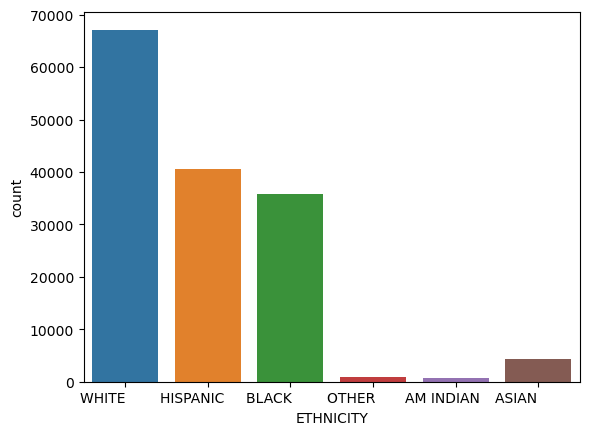

In [372]:
sns.countplot(x='ETHNICITY',data=salary)

## Inference
- Based on **ETHNICITY**, we can know that **WHITE** Ethnicity has more no. of employees.

In [373]:
#GENDER
salary['GENDER'].value_counts()

FEMALE             85328
MALE               64153
Name: GENDER, dtype: int64

<Axes: xlabel='GENDER', ylabel='count'>

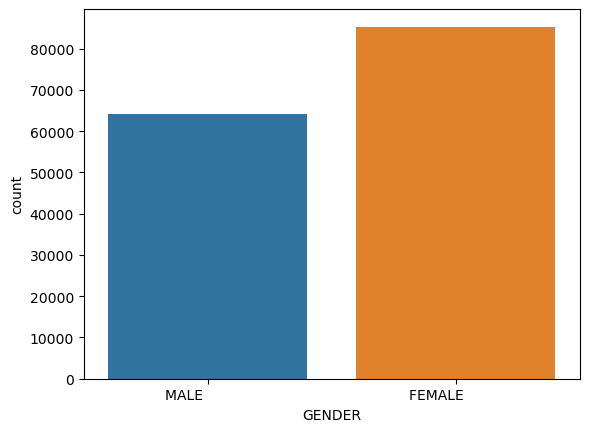

In [374]:
sns.countplot(x='GENDER',data=salary)

## Inference
- Based on **Gender**, we can come to conclusion that **Female** employees are more

In [375]:
#STATUS
salary['STATUS'].nunique()

11

In [376]:
salary['STATUS'].value_counts()

CRF - CLASSIFIED REGULAR FULL-TIME          142502
URF - UNCLASSIFIED REGULAR FULL-TIME          2363
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
ERP - EXEMPT REGULAR PART-TIME                   1
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
Name: STATUS, dtype: int64

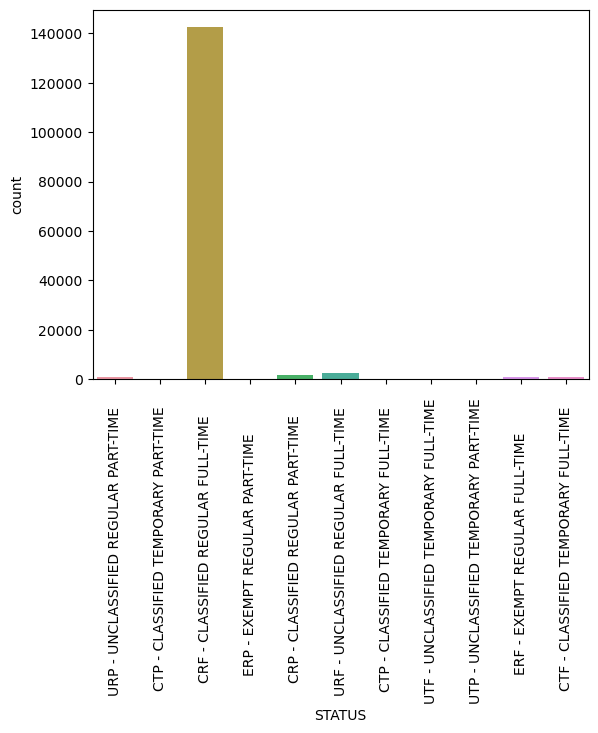

In [377]:
sns.countplot(x='STATUS',data=salary)
plt.xticks(rotation=90)
plt.show()

## Inference
- The maximium no.of employees worked as **CLASSIFIED REGULAR FULL-TIME**

In [378]:
#hourly rate
salary['Hrly_rate'].nunique()

206

In [379]:
salary['Hrly_rate'].value_counts().head(10)

0.00000     147733
75.96150       323
18.00000       104
19.00000        95
67.30765        74
12.50000        66
13.50000        64
13.75000        63
14.00000        56
17.25000        52
Name: Hrly_rate, dtype: int64

<Axes: xlabel='Hrly_rate', ylabel='Count'>

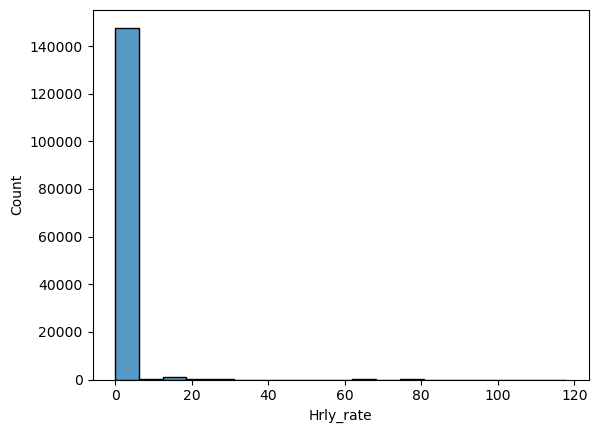

In [380]:
sns.histplot(salary['Hrly_rate'])

In [381]:
#monthly
salary['MONTHLY'].nunique()

40552

In [382]:
salary['MONTHLY'].value_counts()

3720.17    7391
3284.27    5707
3019.84    4540
3480.77    3318
3906.09    1705
           ... 
5213.39       1
2819.12       1
5290.65       1
5929.30       1
1017.46       1
Name: MONTHLY, Length: 40552, dtype: int64

In [383]:
#state number
salary['State_number'].nunique()

149465

In [384]:
salary['State_number'].value_counts()

127717     2
1049439    2
193187     2
949488     2
97642      2
          ..
124412     1
1129493    1
20632      1
1197251    1
103583     1
Name: State_number, Length: 149465, dtype: int64

## Multivariate Analysis

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9052\1687573583.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salary.drop('ANNUAL',axis=1).corr(),annot=True)


<Axes: >

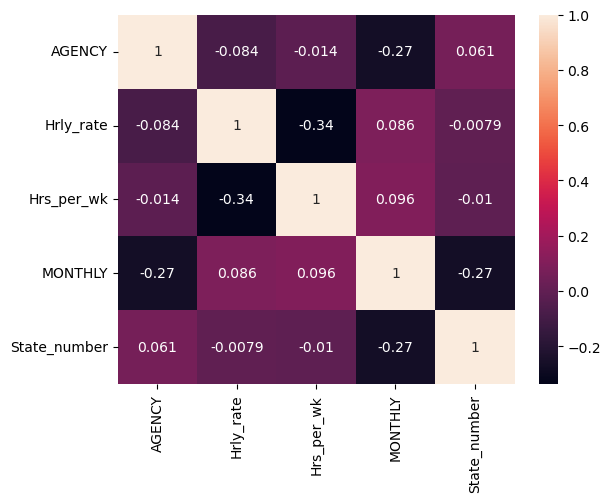

In [385]:
sns.heatmap(salary.drop('ANNUAL',axis=1).corr(),annot=True)

## Observation
- There seems to be no strong correlation between the features.

<Axes: >

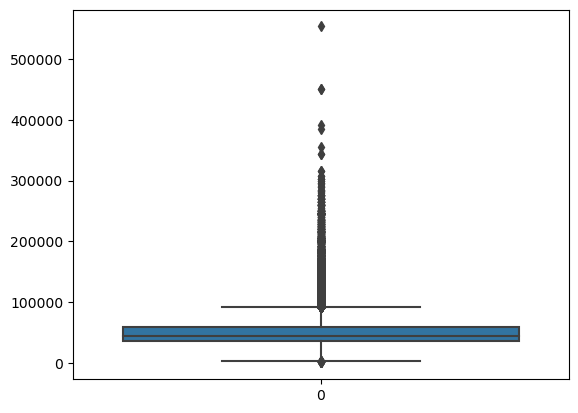

In [386]:
sns.boxplot(salary['ANNUAL'])

## Observation
1)	Who are the outliers in the salaries?
    Since there are too many outliers we can't impute them so we are taking outliers as our original data

2.	What departments/roles have the biggest wage disparities between managers and employees?


In [387]:
salary[['Agency_name','ANNUAL']]

,Agency_name,ANNUAL
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",114549.84
1,OFFICE OF COURT ADMINISTRATION ...,16857.24
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",114549.84
3,OFFICE OF COURT ADMINISTRATION ...,16857.24
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,39411.24
...,...,...
149476,STATE PRESERVATION BOARD ...,34788.00
149477,STATE PRESERVATION BOARD ...,66000.00
149478,STATE PRESERVATION BOARD ...,13447.20
149479,STATE PRESERVATION BOARD ...,68929.92


In [388]:
salary.ANNUAL.max()

553500.0

In [389]:
salary.ANNUAL.min()

600.0

In [391]:
salary.loc[salary['ANNUAL']==553500.0]

,AGENCY,Agency_name,LAST NAME,FIRST NAME,MI,Class_code,Class_title,ETHNICITY,GENDER,STATUS,Employ_date,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL,State_number
83851,542,CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...,WILLSON,JAMES,,C542,CHIEF SCIENTIFIC OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,03/01/16,0.0,40.0,46125.0,553500.0,372291


In [392]:
salary.loc[salary['ANNUAL']==600.0]

,AGENCY,Agency_name,LAST NAME,FIRST NAME,MI,Class_code,Class_title,ETHNICITY,GENDER,STATUS,Employ_date,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL,State_number
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,05/01/20,0.0,10.0,50.0,600.0,851628


**CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS** department is paying highest salary **of  $553500.0 to CHIEF SCIENTIFIC OFFICER.**

**HOUSE OF REPRESENTATIVES** department is paying lowest salary **of $600.0 to ELECTED OFFICIALS STAFF.**

3. Have salaries and total compensations for some roles/ departments/ head-count changed over time?


Yes, for few **CLASS TITLE with respect to AGENCY NAME**, the salaries have changed over a period of time, however for few salaries haven't changed.

In [325]:
salary.head()

,AGENCY,Agency_name,LAST NAME,FIRST NAME,MI,Class_code,Class_title,ETHNICITY,GENDER,STATUS,Employ_date,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL,State_number
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030


In [326]:
#dropping lastname,first name,mi,agency name,class title,employ date
salary.drop(['Agency_name','FIRST NAME','LAST NAME','MI','Class_title','Employ_date','State_number'],axis=1,inplace=True)

## Observations
- For particular **Agency_name** there is unique **AGENCY code** so, we are dropping **Agency_name**
- We are droping **LAST NAME,FIRST NAME,MI** since there is no relation with target variable.
- For particular **Class_title** there is unique **Class_code** so, we are dropping **Class_title**
- We are droping **Employ_data,State_number** since there is no relation with target variable.


In [327]:
salary.head()

,AGENCY,Class_code,ETHNICITY,GENDER,STATUS,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL
0,241,JD25,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84
1,212,3524,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24
2,241,JD25,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84
3,212,3524,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24
4,696,4504,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24


## Categorical Encoding

In [328]:
#class code,ethnicity,gender,status needs to be converted into numerical values(categorical to numerical) (labelencoding)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

salary.Class_code=label.fit_transform(salary.Class_code)
salary.ETHNICITY=label.fit_transform(salary.ETHNICITY)
salary.GENDER=label.fit_transform(salary.GENDER)
salary.STATUS=label.fit_transform(salary.STATUS)

In [329]:
salary.head()

,AGENCY,Class_code,ETHNICITY,GENDER,STATUS,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL
0,241,1409,5,1,8,75.96150,29.0,9545.82,114549.84
1,212,616,5,1,4,81.04454,4.0,1404.77,16857.24
2,241,1409,5,1,8,75.96150,29.0,9545.82,114549.84
3,212,616,5,1,4,81.04453,4.0,1404.77,16857.24
4,696,810,3,0,0,0.00000,40.0,3284.27,39411.24


## Scaling

In [330]:
## scaling
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
salary[['AGENCY']]=scalar.fit_transform(salary[['AGENCY']])

In [331]:
#scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

salary[['Hrly_rate','Hrs_per_wk','MONTHLY','ANNUAL']]=scale.fit_transform(salary[['Hrly_rate','Hrs_per_wk','MONTHLY','ANNUAL']])

In [332]:
salary.head()

,AGENCY,Class_code,ETHNICITY,GENDER,STATUS,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL
0,0.168878,1409,5,1,8,17.954538,-4.610854,2.541505,2.541505
1,0.133896,616,5,1,4,19.161489,-15.368878,-1.347957,-1.347957
2,0.168878,1409,5,1,8,17.954538,-4.610854,2.541505,2.541505
3,0.133896,616,5,1,4,19.161487,-15.368878,-1.347957,-1.347957
4,0.717732,810,3,0,0,-0.082272,0.122677,-0.450008,-0.450008


## Model Building

## Splitting the Features and Target

In [333]:
# x and y
y=salary.pop('ANNUAL')
X=salary

## Splitting Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [335]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(104636, 8) (44845, 8) (104636,) (44845,)


## Linear Regression

In [336]:
lr_model=linear_model.LinearRegression()

## Model Training

In [337]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [338]:
#Accuracy of the model in training data
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)

Accuracy of the model : 1.0


In [339]:
lr_pred=lr_model.predict(X_test)

In [340]:
#Accuracy of the model in testing data
lr=lr_model.score(X_test,y_test)
print('Accuracy of the model :',lr)

Accuracy of the model : 1.0


In [341]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [342]:
#R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 1.0


## Decision Tree

In [343]:
from sklearn.tree import DecisionTreeRegressor
decision=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

## Model Training

In [344]:
decision.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [345]:
#Accuracy score of the model in training data
decision_score=decision.score(X_train,y_train)
print('Accuracy of model :',decision_score)

Accuracy of model : 0.9692930766050146


## Model Testing

In [346]:
#testing the model
dtr=decision.predict(X_test)

In [347]:
dtr = decision.score(X_test,y_test)
print('Accuracy of the model :',dtr)

Accuracy of the model : 0.9629145888185753


In [348]:
#R-squared scores
r2_scores = cross_val_score(decision, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.969230574244737


## KNN Regressor

In [349]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [350]:
KNN = KNeighborsRegressor()

## Model Training

In [351]:
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [352]:
predict=KNN.predict(X_train)

In [353]:
knn = KNN.score(X_train,y_train)
print('Accuracy of the model :',knn)

Accuracy of the model : 0.9901224312703424


## Model Testing

In [354]:
#evaluation using test data
KNN.predict(X_test)

array([-1.11339975, -0.57344205,  1.14066428, ...,  1.59127528,
       -0.05956905, -0.01332291])

In [355]:
knn=KNN.score(X_test,y_test)
print('accuracy of the model : ',knn)

accuracy of the model :  0.9752474000705442


In [356]:
r2_scores = cross_val_score(KNN, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.9781724319369447


## Conclusion

By comparing various regression machine learning models such as **KNN Regressor,Decision Tree Regressor,Linear Regressor**,we found that **Linear Regression model** is best suited for **Texas Salary Prediction Dataset**, based on the above listed r2score  for respective machine learning models.

# Challenges we faced

-  Identifying the right set of features that effectively capture the underlying patterns in the data is crucial.
-  Choosing the appropriate machine learning algorithm or model architecture is crucial for achieving good performance. Different algorithms have different strengths and weaknesses, and selecting the right one depends on the problem, the available data.